## Import library dan dataset

In [ ]:
import pandas as pd
import warnings

pd.set_option('display.float_format', lambda x: '%.4f' % x)
warnings.filterwarnings('ignore')


df = pd.read_csv("/content/data_traveloka.csv")

## Exploratory Data Analysis

In [ ]:
# cek overview dataset secara random
df.sample(3)

,Hotel Name,Original price,Price after discount,Tax,Rating,location
759,The Kutaya Guest House,Rp 312.862,Rp 286.013,Inclusive of taxes,8.2000,"Kuta, Bali"
575,Jukung Guest House,Rp 450.000,Rp 337.500,Inclusive of taxes,8.9000,"Sanur, Bali"
275,Yucca Villas,Rp 5.750.000,Rp 2.875.000,Inclusive of taxes,9.2000,"Canggu, Bali"


In [ ]:
# total dimensi data
print("rows: {} dan cols: {}".format(df.shape[0], df.shape[1]))

rows: 1012 dan cols: 6


In [ ]:
# cek informasi dari tiap fitur pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            1012 non-null   object 
 1   Original price        1012 non-null   object 
 2   Price after discount  1012 non-null   object 
 3   Tax                   1012 non-null   object 
 4   Rating                876 non-null    float64
 5   location              1012 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.6+ KB


In [ ]:
# total data hotel dibali 
# total lokasi hotel dibali 
print('Jumlah data hotel dibali:', len(df['Hotel Name'].unique()))
print('Jumlah data lokasi hotel dibali:', len(df['location'].unique())) 

Jumlah data hotel dibali: 990
Jumlah data lokasi hotel dibali: 84


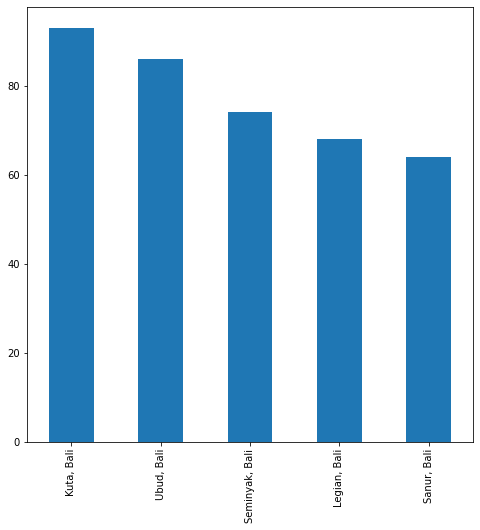

In [ ]:
# cek lokasi hotel terbanyak pada dataset
lokasi = df['location'].value_counts()[:5]
lokasi.plot(kind='bar', figsize=(8,8))

## Data Preprocessing

In [ ]:
# melihat missing value
Total = df.isnull().sum().sort_values(ascending=False)          

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Rating,136,13.4387
Hotel Name,0,0.0000
Original price,0,0.0000
Price after discount,0,0.0000
Tax,0,0.0000
location,0,0.0000


In [ ]:
# menghapus missing value pada dataset
df = df.dropna()

In [ ]:
# menghilangkan karakter unik pada dataset untuk dilakukan convert dataset
df['Original price'] = df['Original price'].str.replace('Rp ', '')
df['Original price'] = df['Original price'].str.replace('.', '')
df['Price after discount'] = df['Price after discount'].str.replace('Rp ', '')
df['Price after discount'] = df['Price after discount'].str.replace('.', '')
df['location'] = df['location'].str.replace(',', '')
df['location'] = df['location'].str.replace(' ', '')
df.head()

,Hotel Name,Original price,Price after discount,Tax,Rating,location
0,The Anvaya Beach Resort Bali,5022000,4017600,Inclusive of taxes,8.9000,KutaBali
1,The Apurva Kempinski Bali,14520640,10890480,Inclusive of taxes,8.9000,NusaDuaBeachBali
2,"The Westin Resort Nusa Dua, Bali",4001067,3000800,Inclusive of taxes,8.8000,TheWestinResortNusaDuaBali
3,The Sakala Resort Bali - All Suites,2400000,1392000,Inclusive of taxes,8.5000,TanjungBenoaBali
4,Discovery Kartika Plaza Bali,1733333,1300000,Inclusive of taxes,8.6000,KutaBali


In [ ]:
# convert fitur dari object ke integer
cols = ['Original price', 'Price after discount'  ]

for col in cols:
  df[col] = df[col].astype('int')

In [ ]:
# cek statistika deskripsi pada fitur dataset
df.describe()

,Original price,Price after discount,Rating
count,876.0000,876.0000,876.0000
mean,1923463.9555,1280057.5194,8.4323
std,3979703.4323,2986544.9362,0.5145
min,63333.0000,47500.0000,5.6000
25%,380000.0000,250000.0000,8.2000
50%,838052.0000,549999.0000,8.5000
75%,1942893.7500,1262362.5000,8.8000
max,60980499.0000,49394204.0000,9.7000


In [ ]:
df = df.drop(columns='Tax')

In [ ]:
df.head()

,Hotel Name,Original price,Price after discount,Rating,location
0,The Anvaya Beach Resort Bali,5022000,4017600,8.9000,KutaBali
1,The Apurva Kempinski Bali,14520640,10890480,8.9000,NusaDuaBeachBali
2,"The Westin Resort Nusa Dua, Bali",4001067,3000800,8.8000,TheWestinResortNusaDuaBali
3,The Sakala Resort Bali - All Suites,2400000,1392000,8.5000,TanjungBenoaBali
4,Discovery Kartika Plaza Bali,1733333,1300000,8.6000,KutaBali


In [ ]:
# validasi duplikat value
df1 = df.copy()
df1["is_duplicate"]= df1.duplicated()

df3 = []
duplikat = df1[df1['is_duplicate'] == True]
for i in duplikat['Hotel Name']:
  df3.append(df1[df1['Hotel Name'] == i])
out = pd.concat(df3,ignore_index = True)
out

,Hotel Name,Original price,Price after discount,Rating,location,is_duplicate
0,Bumi Linggah Villas Bali,1845375,830419,8.8000,SukawatiBali,False
1,Bumi Linggah Villas Bali,1845375,830419,8.8000,SukawatiBali,True
2,Dee Mansion,358938,183058,8.1000,WestDenpasarBali,False
3,Dee Mansion,358938,183058,8.1000,WestDenpasarBali,True
4,Fourteen Roses Boutique Hotel Kuta,810000,518400,8.1000,LegianBali,False
5,Fourteen Roses Boutique Hotel Kuta,810000,518400,8.1000,LegianBali,True
6,Jasmine Inn Nusa Penida,226667,170000,8.6000,NusaPenidaBali,False
7,Jasmine Inn Nusa Penida,226667,170000,8.6000,NusaPenidaBali,True
8,The Kryamaha Villas,2903987,1732499,8.8000,TanahLotBali,False
9,The Kryamaha Villas,2903987,1732499,8.8000,TanahLotBali,True


In [ ]:
# cek total data duplikat
df.duplicated().sum()

14

In [ ]:
# menghapus data duplikat pada dataset
df = df.drop_duplicates()

In [ ]:
df.sample(3)

,Hotel Name,Original price,Price after discount,Rating,location
334,The Pari Sudha,1554798,932879,8.7000,UbudBali
62,Lloyd's Inn Bali,1959404,1345049,8.6000,SeminyakBali
239,The Ayu Kintamani Villa at Toya Devasya,2905000,1888250,8.3000,KintamaniBali


## Modelling

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data cuisine
tf.fit(df['location']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 


['abiansemalbali',
 'amedbali',
 'amlapurabali',
 'balianbali',
 'banjarbali',
 'batubulanbali',
 'baturitibali',
 'bedugulbali',
 'besakihbali',
 'candidasabali',
 'canggubali',
 'eastdenpasarbali',
 'gianyarkotabali',
 'gilimanukbali',
 'jatiluwihbali',
 'jimbaranbali',
 'kedewatanbali',
 'kemenuhbali',
 'keramasbali',
 'kerambitanbali',
 'kerobokanbali',
 'kintamanibali',
 'klungkungbali',
 'kutabali',
 'kutuhbali',
 'legianbali',
 'lovinabali',
 'margabali',
 'marriott',
 'medewibali',
 'mendoyobali',
 'mengwibali',
 'menjanganbali',
 'monkeyforestbali',
 'mundukbali',
 'negarabali',
 'northdenpasarbali',
 'nusaceninganbali',
 'nusaduabali',
 'nusaduabeachbali',
 'nusaduabeachhotel',
 'nusalembonganbali',
 'nusapenidabali',
 'padangbaibali',
 'payanganbali',
 'pecatubali',
 'pekutatanbali',
 'pemuteranbali',
 'penebelbali',
 'plagabali',
 'poppiesbali',
 'sanurbali',
 'sautographcollectionthestoneshotelbali',
 'sayanbali',
 'sebatubali',
 'selemadegbali',
 'semarapurakelodbali',
 '

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df['location']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(862, 83)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama resto
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df['Hotel Name']
).sample(10, axis=1).sample(10, axis=0)

,canggubali,banjarbali,balianbali,payanganbali,nusaceninganbali,spanusaduabali,selemadegbali,susutbali,tejakulabali,medewibali
Hotel Name,,,,,,,,,,
The Kasih Villas & Spa,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Dedary Resort Ubud,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
The Ritz-Carlton Bali Villas,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Familytel Bali,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Green Field Hotel and Restaurant,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
OYO 3096 Hotel Dewi Warsiki,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
HARRIS Hotel and Conventions Denpasar Bali,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Ramada by Wyndham Bali Sunset Road Kuta,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Dhyana Pura City Hotel,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Hotel Name'], columns=df['Hotel Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (862, 862)


Hotel Name,OYO 3096 Hotel Dewi Warsiki,Hotel Gran Surya,OYO 2270 Hotel Taman Wirama,Gending Kedis Luxury Villas & Spa Estate,Angsoka Hotel
Hotel Name,,,,,
Mimpi Resort Menjangan,0.0000,0.0000,0.0000,0.0000,0.0000
Ubud Glassy Villas by Pramana Villas,0.0000,0.0000,0.0000,0.0000,0.0000
The Backyard House,0.0000,0.0000,0.0000,0.0000,0.0000
Sujiwa Ubud Retreat Villa,0.0000,0.0000,0.0000,0.0000,0.0000
Bali Mandira Beach Resort & Spa,0.0000,0.0000,0.0000,0.0000,0.0000
Alengkong Double View,0.0000,0.0000,0.0000,0.0000,0.0000
OYO 3975 Gita Inn,0.0000,0.0000,1.0000,0.0000,0.0000
Hotel Mandari,0.0000,0.0000,0.0000,0.0000,0.0000
Suma Beach Hotel,0.0000,0.0000,0.0000,0.0000,1.0000


In [ ]:
# validasi hasil cosine similarity
df[df['Hotel Name'] == "Hotel Kumala Pantai"] 

,Hotel Name,Original price,Price after discount,Rating,location
704,Hotel Kumala Pantai,1457592,1000585,8.7000,LegianBali


In [ ]:
# validasi hasil cosine similarity
df[df['Hotel Name'] == "OYO 1654 Maha Bharata Kuta Inn"] 

,Hotel Name,Original price,Price after discount,Rating,location
273,OYO 1654 Maha Bharata Kuta Inn,357452,178726,7.8000,LegianBali


In [ ]:
# membuat sebuah fungsi untuk menampilkan 5 data teratas hotel rekomendasi berdasarkan lokasi
def hotel_recommendations(nama_hotel, similarity_data=cosine_sim_df, items=df[['Hotel Name', 'location']], k=5):
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_hotel].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_hotel agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_hotel, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# validasi hasil dari fungsi hotel_recommendations
df[df['Hotel Name'].eq('Matahari Bungalow')]

,Hotel Name,Original price,Price after discount,Rating,location
656,Matahari Bungalow,622618,290768,8.0000,LegianBali


## Evaluation

In [ ]:
# menampilkan 5 data teratas rekomendasi hotel berdasarkan lokasi Legian, Bali
hotel_recommendations('Matahari Bungalow')

,Hotel Name,location
0,Ossotel Legian,LegianBali
1,The Legian 777,LegianBali
2,Nakula Stay Kuta,LegianBali
3,City Garden Bali Dwipa Hotel,LegianBali
4,Cempaka Losmen,LegianBali
